In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family = 'Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'scatterPlotExam'
filename = './../data/mpg.csv'
plt.style.use('ggplot')

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
mpg = pd.read_csv(filename, encoding='utf-8')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


scatterPlotExam_01.png파일이 저장되었습니다.


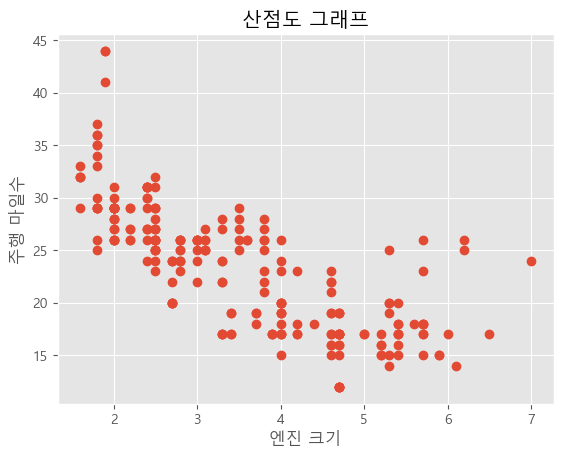

In [5]:
xdata = mpg.loc[:, ['displ']]
ydata = mpg.loc[:, ['hwy']]

plt.figure()
plt.plot(xdata, ydata, marker = 'o', linestyle = 'None')
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일수')
plt.title('산점도 그래프')
plt.grid(True)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

In [6]:
mycolors = ['r', 'g', 'b']

label_dict = {'f' : '전륜 구동', '4' : '사륜 구동', 'r' : '후륜 구동'}

scatterPlotExam_02.png파일이 저장되었습니다.


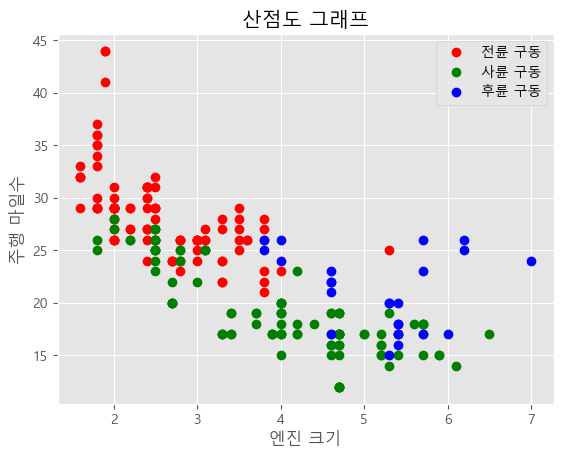

In [7]:
plt.figure()

idx = 0
labels = mpg['drv'].unique()

for findItem in labels :
    xdata = mpg.loc[mpg['drv'] == findItem, 'displ']
    ydata = mpg.loc[mpg['drv'] == findItem, 'hwy']
    plt.plot(xdata, ydata, color = mycolors[idx], marker = 'o', linestyle = 'None', label = label_dict[findItem])
    idx += 1

plt.legend()
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일수')
plt.title('산점도 그래프')
plt.grid(True)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

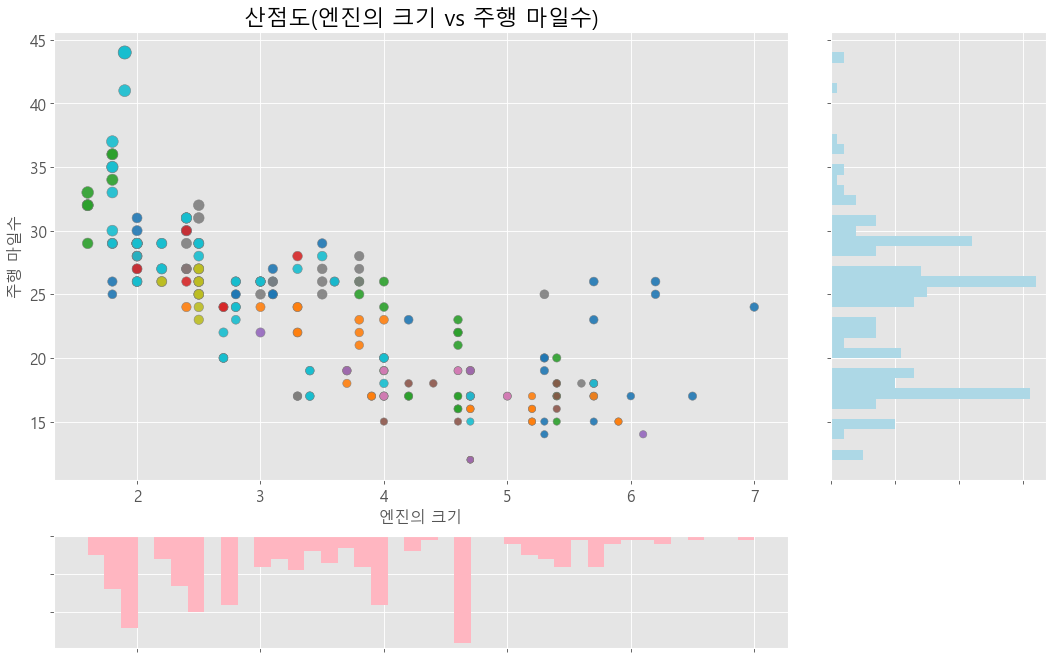

In [8]:
# Create Fig and gridspec
fig = plt.figure(figsize = (16, 10), dpi = 80)
grid = plt.GridSpec(4, 4, hspace = 0.5, wspace = 0.2)

# 축 정의
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels = [], yticklabels = [])

# 메인 그래프에 산점도 그리기
ax_main.scatter('displ', 'hwy', s = mpg.cty * 4, c = mpg.manufacturer.astype('category').cat.codes, alpha = .9, data = mpg, cmap = 'tab10', edgecolors = 'gray', linewidths = .5)

# 하단의 histogram
ax_bottom.hist(mpg.displ, 40, histtype = 'stepfilled', orientation = 'vertical', color = 'lightpink')
ax_bottom.invert_yaxis()

# 오른쪽 histogram
ax_right.hist(mpg.hwy, 40, histtype = 'stepfilled', orientation = 'horizontal', color = 'lightblue')

# Decorations
ax_main.set(title = '산점도(엔진의 크기 vs 주행 마일수)', xlabel = '엔진의 크기', ylabel = '주행 마일수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

In [9]:
xlabel = ax_main.get_xticks().tolist()
cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

scatterPlotExam_03.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

In [10]:
diamond_file = './../data/diamonds.csv'

diamonds = pd.read_csv(diamond_file)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
FRACTION = 0.005
diamonds = diamonds.sample(frac = FRACTION)

diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [12]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000
mean,0.817556,61.757407,57.371852,4222.055556,5.756852,5.762074,3.55563
std,0.509653,1.291753,2.184659,4395.347589,1.196710,1.189263,0.73348
min,0.230000,56.700000,53.000000,403.000000,3.950000,3.950000,2.40000
25%,0.390000,61.025000,56.000000,935.250000,4.692500,4.702500,2.89250
50%,0.700000,61.900000,57.000000,2384.500000,5.690000,5.680000,3.49500
75%,1.070000,62.500000,59.000000,5716.750000,6.620000,6.617500,4.07750
max,2.610000,66.300000,65.000000,18756.000000,8.850000,8.730000,5.46000


In [13]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
6471,0.91,Very Good,F,SI2,60.9,58.0,4054,6.28,6.20,3.80
13013,1.00,Good,F,VS2,64.4,56.0,5407,6.23,6.28,4.03
13337,1.23,Premium,J,VS2,61.9,55.0,5504,6.94,6.88,4.28
4408,0.31,Ideal,I,VVS1,62.1,56.0,571,4.35,4.38,2.71
17046,0.32,Ideal,E,VS2,61.3,56.0,612,4.41,4.46,2.72


In [14]:
xdata = diamonds['price']   # x축
ydata = diamonds['depth']   # y축
table = diamonds['table']   # 원의 크기

table.max()

np.float64(65.0)

In [15]:
table.min()

np.float64(53.0)

In [16]:
mycolor = ['r', 'g', 'b' , 'y', 'm']
cut_list = diamonds['cut'].unique()
cut_list

array(['Very Good', 'Good', 'Premium', 'Ideal', 'Fair'], dtype=object)

In [17]:
cut_dict = {cut_list[idx]:mycolor[idx] for idx in range(len(cut_list))}
cut_dict

{'Very Good': 'r', 'Good': 'g', 'Premium': 'b', 'Ideal': 'y', 'Fair': 'm'}

In [18]:
def recode_cut(cut) :
    return cut_dict[cut]

diamonds['newcut'] = diamonds['cut'].apply(recode_cut)
newcut = diamonds['newcut']

In [19]:
def recode_table(table) :
    if table >= 60 :
        return 100
    elif table >= 58 :
        return 30
    elif table >= 54 :
        return 5
    else :
        return 1

diamonds['newtable'] = diamonds['table'].apply(recode_table)
newtable = diamonds['newtable']

In [20]:
diamonds.loc[:, ['price', 'depth', 'newtable', 'table', 'newcut']]

,price,depth,newtable,table,newcut
6471,4054,60.9,30,58.0,r
13013,5407,64.4,5,56.0,g
13337,5504,61.9,5,55.0,b
4408,571,62.1,5,56.0,y
17046,612,61.3,5,56.0,y
...,...,...,...,...,...
24625,12958,62.6,5,55.0,b
4739,573,61.7,30,58.0,y
41176,1200,60.9,5,57.0,b
21173,9332,60.4,100,60.0,r


scatterPlotExam_04.png파일이 저장되었습니다.


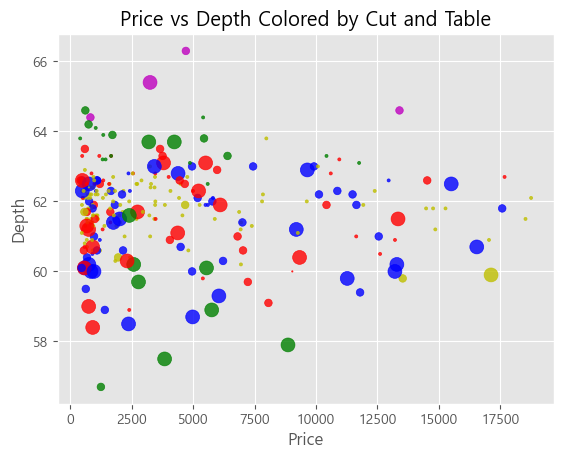

In [21]:
scatter_plot = plt.figure()
ax1 =  scatter_plot.add_subplot(1, 1, 1)

ax1.scatter(x = xdata, y = ydata, s = newtable, c = newcut, alpha = 0.8)

ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')
